# 연립방정식

## 연립방정식을 행렬로 변환하기

## 행렬 방정식 다루기

In [1]:
import numpy as np

A = np.random.randn(4,4)
B = np.random.randn(4,4)

X1 = np.linalg.inv(A) @ B
X2 = B @ np.linalg.inv(A)

np.allclose(A, B)

False

# 행 축소

## 가우스 소거법

## 가우스-조던 소거법

In [2]:
import sympy as sym

M = np.array([[1, 1, 4], [-1/2, 1, 2]])
symMat = sym.Matrix(M)

symMat.rref()[0]

Matrix([
[1, 0, 1.33333333333333],
[0, 1, 2.66666666666667]])

## 가우스-조던 소거법을 통한 역행렬 계산

# LU 분해

In [4]:
import scipy

A = np.array([[2, 2, 4], [1, 0, 3], [2, 1, 2]])

_, L, U = scipy.linalg.lu(A)

print('L:')
print(L)
print('U:')
print(U)

L:
[[1.  0.  0. ]
 [0.5 1.  0. ]
 [1.  1.  1. ]]
U:
[[ 2.  2.  4.]
 [ 0. -1.  1.]
 [ 0.  0. -3.]]


## 치환 행렬을 통한 행 교환

# 연습 문제

## 연습 문제 9-1
- 100x100 크기의 행렬 1000개에 대해 LU 분해를 실행하는데 걸리는 시간은?

In [12]:
import time
from tqdm import tqdm
from scipy.linalg import lu_factor

def my_function():
    # 실행 시간을 측정하려는 함수
    total = 0
    for i in tqdm(range(1000)):
        A = np.random.randn(100, 100)
#         _, L, U = scipy.linalg.lu(A)
        lu, piv = lu_factor(A)
        total += i
    return total

start_time = time.time()  # 함수 실행 전 현재 시간 측정
result = my_function()    # 함수 실행
end_time = time.time()    # 함수 실행 후 현재 시간 측정

execution_time = end_time - start_time  # 실행 시간 계산
print("함수 실행 시간:", execution_time, "초")

100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 1073.24it/s]

함수 실행 시간: 0.9399561882019043 초


- 정답

In [14]:
# Time-test!

import time

# start the timer
tic = time.time()

# run the test
for i in range(1000):
    A = np.random.randn(100,100)
    P,L,U = scipy.linalg.lu(A)

# stop the timer
toc = time.time() - tic
toc # print the result in seconds

1.3432891368865967

## 연습 문제 9-2
- 행렬 곱을 사용, 계수 -3의 6x8행렬을 만든다
- 이 행렬의 LU 분해 결과를 시각화 한다

In [16]:
M = 6
N = 8
r = 3

A = np.random.randn(M, r) @ np.random.randn(r, N)

np.linalg.matrix_rank(A)

3

In [17]:
P, L, U = scipy.linalg.lu(A)

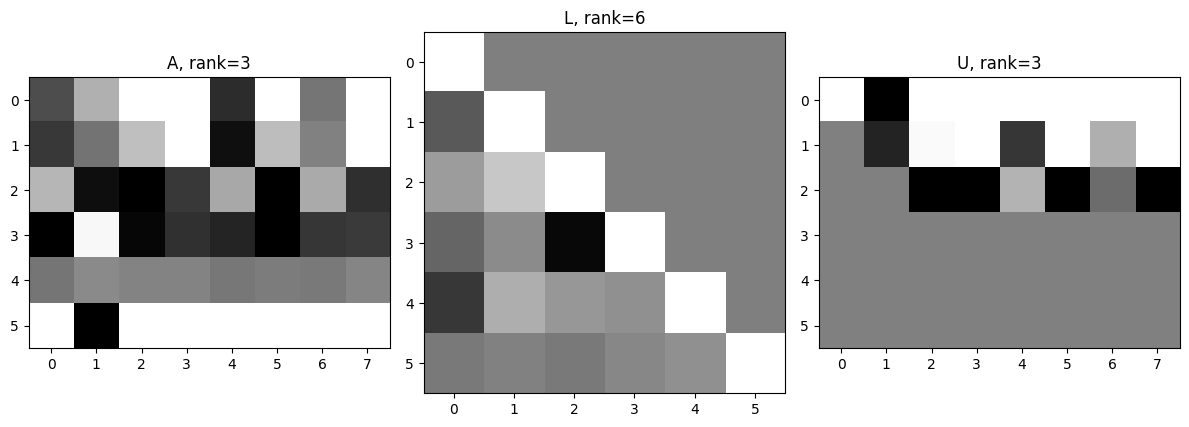

In [19]:
import matplotlib.pyplot as plt

# and plot
_,axs = plt.subplots(1,3,figsize=(12,7))

axs[0].imshow(A,vmin=-1,vmax=1,cmap='gray')
axs[0].set_title(f'A, rank={np.linalg.matrix_rank(A)}')

axs[1].imshow(L,vmin=-1,vmax=1,cmap='gray')
axs[1].set_title(f'L, rank={np.linalg.matrix_rank(L)}')

axs[2].imshow(U,vmin=-1,vmax=1,cmap='gray')
axs[2].set_title(f'U, rank={np.linalg.matrix_rank(U)}')

plt.tight_layout()
plt.show()

## 연습 문제 9-3
- LU분해를 통해 행렬식을 계산해 보자
- 무작위의 행렬을 만들어 U의 대각선의 곱이, 해당 행렬의 np.linalg.det(A)와 같은지 확인해 보라
- 부호가 달라 짐을 확인 가능 할 것이다
- P에 따라 행을 짝수 교화 하면 +1, 홀수 교환하면 -1이 된다

In [41]:
M = 3
A = np.random.randn(M, M)

P, L, U = scipy.linalg.lu(A)

comp1 = np.prod(np.diag(U))
comp2 = np.linalg.det(A)
comp3 = np.linalg.det(P)
print(P)

comp1, comp2, comp3

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


(1.6908999795799708, -1.6908999795799708, -1.0)

- 정답

In [42]:
# a matrix and its det
M = 6
A = np.random.randn(M,M)

# LU
P,L,U = scipy.linalg.lu(A)

# determinant as the product of the diagonals of U
detLU = np.prod( np.diag(U) ) * np.linalg.det(P)

# check against the det function
detNP = np.linalg.det(A)

# compare
print(detLU,detNP)
print(detLU-detNP)

22.048297185736423 22.04829718573642
3.552713678800501e-15


## 연습 문제 9-4
- $A = P^TLU$
- $A^{-1} = (P^TLU)^{-1}$
- $A^{-1} = U^{-1}L^{-1}P$

In [37]:
M = 3
A = np.random.randn(M, M)
P, L, U = scipy.linalg.lu(A)

A_inv = np.linalg.inv(A)
U_inv = np.linalg.inv(U)
L_inv = np.linalg.inv(L)

comp = U_inv@L_inv@P.T

print(P, np.linalg.det(P))

np.allclose(A_inv, comp)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]] -1.0


True

- 정답

In [14]:
# matrix sizes
m = 4
A = np.random.randn(m,m)

# LU decomposition
P,L,U = scipy.linalg.lu(A)

# inverse
invViaLU = np.linalg.inv(U) @ np.linalg.inv(L) @ P.T

# "regular" inverse
invViaInv = np.linalg.inv(A)

np.round( A@invViaLU ,10)

np.allclose(invViaLU, invViaInv)

True

## 연습 문제 9-5
- $A = PLU$에서 치환 행렬을 사용하지 않고 $A^TA$를 $U^TL^TLU$로 계산 가능하다
- 치환행렬을 삭제 가능한 이유는 무엇인가?
    - $P^TP=I$
    - $P^T = P^{-1}$
    - I에 대한 치환을 되돌리면, I 
- $P \neq I$일 때도, $A^TA = U^TL^TLU$ 임을 보여라

In [62]:
M = 3
A = np.random.randn(M, M)
P, L, U = scipy.linalg.lu(A)

comp1 = A.T@A
comp2 = U.T@L.T@L@U

print(P)

np.allclose(comp1, comp2)

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


True